In [105]:
import os
if not os.path.exists("/content/data"):
  os.mkdir("/content/data")
if not os.path.exists("/content/data/tcp"): # D:\TCP\out_files\ssl
  os.mkdir("/content/data/tcp")
  os.mkdir("/content/data/tcp/ssl")
  os.mkdir("/content/data/tcp/nossl")
if not os.path.exists("/content/data/quic"): # D:\qbuild\ns3\out_files
  os.mkdir("/content/data/quic")
if not os.path.exists("/content/data/udt"): # D:\udt-git\udt4\out_files
  os.mkdir("/content/data/udt")
if not os.path.exists("/content/data/tcp/nossl"): #  D:\TCP\out_files\nossl
  os.mkdir("/content/data/udt")

In [106]:
import shutil
#shutil.rmtree("/content/data/tcp")

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
from prettytable import PrettyTable

In [108]:
def print3(y1, y2, y3, min1, min2,min3, max1, max2,max3, strX="asd"):  
    print(strX+ '\t'+''.join(str(e)+"\t" for e in x1))
    print("UDT  mean:\t"+''.join(str(e)+"\t" for e in np.round(y1, 2)))
    print(" p20:\t"+''.join(str(e)+"\t" for e in np.round(min1, 2)))
    print(" p90:\t"+''.join(str(e)+"\t" for e in np.round(max1, 2)))

    print("QUIC  mean:\t"+''.join(str(e)+"\t" for e in np.round(y2, 2)))
    print(" p20:\t"+''.join(str(e)+"\t" for e in np.round(min2, 2)))
    print(" p90:\t"+''.join(str(e)+"\t" for e in np.round(max2, 2)))

    print("TCP mean:\t"+''.join(str(e)+"\t" for e in np.round(y3, 2)))
    print(" p20:\t"+''.join(str(e)+"\t" for e in np.round(min3, 2)))
    print(" p90:\t"+''.join(str(e)+"\t" for e in np.round(max3, 2)))

def print4(y1, y2, y3,y4, min1, min2,min3,min4, max1, max2,max3,max4, strX="asd"):  
    print(strX+ '\t'+''.join(str(e)+"\t" for e in x1))
    print("UDT  mean:\t"+''.join(str(e)+"\t" for e in np.round(y1, 2)))
    print(" p20:\t"+''.join(str(e)+"\t" for e in np.round(min1, 2)))
    print(" p90:\t"+''.join(str(e)+"\t" for e in np.round(max1, 2)))

    print("QUIC  mean:\t"+''.join(str(e)+"\t" for e in np.round(y2, 2)))
    print(" p20:\t"+''.join(str(e)+"\t" for e in np.round(min2, 2)))
    print(" p90:\t"+''.join(str(e)+"\t" for e in np.round(max2, 2)))

    print("TCP ssl mean:\t"+''.join(str(e)+"\t" for e in np.round(y3, 2)))
    print(" ssl p20:\t"+''.join(str(e)+"\t" for e in np.round(min3, 2)))
    print(" ssl p90:\t"+''.join(str(e)+"\t" for e in np.round(max3, 2)))

    print("TCP nossl mean:\t"+''.join(str(e)+"\t" for e in np.round(y4, 2)))
    print(" nossl p20:\t"+''.join(str(e)+"\t" for e in np.round(min4, 2)))
    print(" nossl p90:\t"+''.join(str(e)+"\t" for e in np.round(max4, 2)))


In [109]:
#QUIC годовим данные от QUIC
# D:\qbuild\ns3\out_files

def dataName(byte_size, err, p2p):
  return(byte_size+"-"+err+"-"+p2p+"")

def addDFtoDict(dataF, dataN):
  quicDataDict[dataN] = dataF
 
#print(getDFfromDict(dataName(byte_size, err, p2p)))
def getDFfromDict(dataN):
  return quicDataDict[dataN]

def existKey(key):
  return key in quicDataDict

quicDataDict = dict()
onlyfilesquick = [f for f in listdir('/content/data/quic') if isfile(join('/content/data/quic', f))]
for fs in onlyfilesquick:
  if fs.find('.bak') != -1:
    os.remove("/content/data/quic/"+fs)
    print("remove")
    continue
  tmp = fs.replace('get_res_with_', '')
  tmp = tmp.replace('_b_', '_')
  tmp = tmp.replace('ms', '')
  tmp = tmp.replace('_kBBR.txt', '')  
  params = tmp.split("_")
  byte_size = params[0]
  p2p = params[1]
  err = params[2]

  _data = pd.read_csv('/content/data/quic/'+fs, sep=',', header=None)
  timerow = _data.iloc[:, 0]
  timerow.rename("TIME")

  byte_sizerow = np.empty(timerow.size)
  byte_sizerow.fill(byte_size)
  byte_sizeSer = pd.Series(byte_sizerow)
  byte_sizeSer.rename("BYTES_COUNT")

  p2prow = np.empty(timerow.size)
  p2prow.fill(byte_size)
  p2pSer = pd.Series(p2prow)
  p2pSer.rename("P2P_DELAY")

  errrow = np.empty(timerow.size)
  errrow.fill(byte_size)
  errSer = pd.Series(errrow)
  errSer.rename("ERROR_RATE")

  gooddata = pd.DataFrame({'BYTES_COUNT':byte_sizeSer.values, 'P2P_DELAY':p2pSer.values, 'ERROR_RATE':errSer.values, 'TIME':timerow.values})

  addDFtoDict(gooddata,dataName(byte_size, err, p2p))

#print(getDFfromDict(dataName(byte_size, err, p2p)))

In [110]:
def resfile(byte_size, err, p2p):
  return "res_with_" + byte_size + "_" + p2p + "_" + err + "_b.txt";

In [111]:
#UDT
# D:\udt-git\udt4\out_files
onlyfiles = [f for f in listdir('/content/data/udt') if isfile(join('/content/data/udt', f))]
#print(onlyfiles)

In [112]:
# Собираем наборы параметров сети
i=0
byte_sizeArr = []
p2pArr = []
errArr = []

for fl in onlyfiles:
  _data = pd.read_csv('/content/data/udt/'+fl, sep='\t')
  byte_size = _data[_data.columns[0]].iloc[0]
  p2p = _data[_data.columns[1]].iloc[0]
  err = _data[_data.columns[2]].iloc[0]
  if not(byte_size in byte_sizeArr):
    byte_sizeArr.append(byte_size)
  if not(p2p in p2pArr):
    p2pArr.append(p2p)
  if not(err in errArr):
    errArr.append(err)    
  i=i+1
byte_sizeArr.sort()
p2pArr.sort()
errArr.sort()
print("")

p2p = 1
err	0.0	1.0	5.0	10.0	
UDT  mean:	129.97	661.46	1408.34	6913.6	
 p20:	112.98	123.48	5212.94	18288.87	
 p90:	79.69	72.67	72.23	76.25	
QUIC  mean:	5.96	14.77	26.35	149.25	
 p20:	6.34	17.63	63.01	282.91	
 p90:	5.65	6.07	5.88	6.18	
TCP mean:	16.9	126.62	459.21	805.72	
 p20:	20.09	326.08	1217.03	1810.88	
 p90:	14.68	15.1	20.11	25.08	


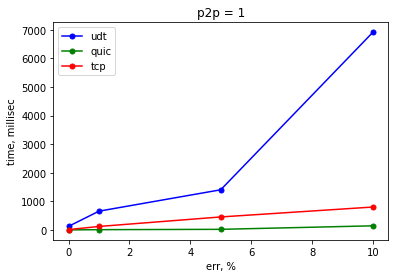

+--------------+--------+--------+---------+--------+
| protocol/err |  0.0   |  1.0   |   5.0   |  10.0  |
+--------------+--------+--------+---------+--------+
|     udt      | 129.97 | 661.46 | 1408.34 | 6913.6 |
|     quic     |  5.96  | 14.77  |  26.35  | 149.25 |
|     tcp      |  16.9  | 126.62 |  459.21 | 805.72 |
+--------------+--------+--------+---------+--------+
p2p = 50
err	0.0	1.0	5.0	10.0	
UDT  mean:	2067.74	2495.39	3879.0	6285.63	
 p20:	2061.44	2115.58	9809.84	16392.09	
 p90:	2043.53	2042.51	2044.57	2049.18	
QUIC  mean:	105.15	140.57	213.75	971.5	
 p20:	106.65	107.55	403.56	1642.69	
 p90:	104.2	104.43	104.63	104.91	
TCP mean:	415.68	523.96	906.39	1070.41	
 p20:	418.31	736.39	1686.19	2006.71	
 p90:	413.68	412.37	412.86	417.45	


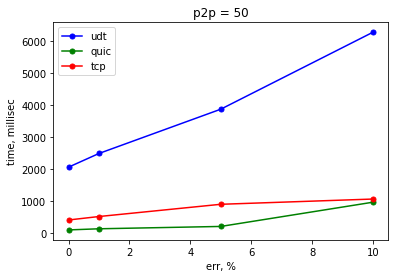

+--------------+---------+---------+--------+---------+
| protocol/err |   0.0   |   1.0   |  5.0   |   10.0  |
+--------------+---------+---------+--------+---------+
|     udt      | 2067.74 | 2495.39 | 3879.0 | 6285.63 |
|     quic     |  105.15 |  140.57 | 213.75 |  971.5  |
|     tcp      |  415.68 |  523.96 | 906.39 | 1070.41 |
+--------------+---------+---------+--------+---------+
p2p = 100
err	0.0	1.0	5.0	10.0	
UDT  mean:	4069.41	4442.01	5382.06	7940.18	
 p20:	4117.96	4380.28	9200.74	14946.97	
 p90:	4044.89	4044.72	4043.19	4047.91	
QUIC  mean:	205.72	254.99	355.23	1116.88	
 p20:	206.97	208.12	765.31	2057.64	
 p90:	204.92	204.48	205.26	204.96	
TCP mean:	816.61	915.67	1229.85	1391.0	
 p20:	818.45	820.02	2050.28	2322.68	
 p90:	815.03	814.76	815.73	815.86	


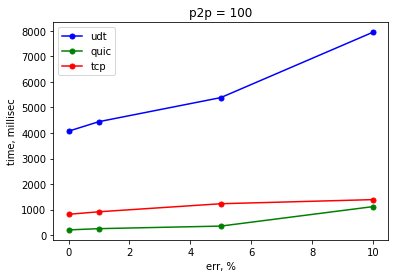

+--------------+---------+---------+---------+---------+
| protocol/err |   0.0   |   1.0   |   5.0   |   10.0  |
+--------------+---------+---------+---------+---------+
|     udt      | 4069.41 | 4442.01 | 5382.06 | 7940.18 |
|     quic     |  205.72 |  254.99 |  355.23 | 1116.88 |
|     tcp      |  816.61 |  915.67 | 1229.85 |  1391.0 |
+--------------+---------+---------+---------+---------+


In [113]:
# UDT данные + график с QUIC

# МИНИМАЛЬНЫЙ РАЗМЕР
for p2p in p2pArr:
  for byte_size in byte_sizeArr:
    th = [...]
    td = [...]
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    x3 = []
    y3 = []
    min1=[]
    min2=[]
    min3=[]
    max1=[]
    max2=[]
    max3=[]
    for err in errArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      if existKey(dataName(str(byte_size), str(err), str(p2p))) == False:
        continue
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      #_dataTCP = _dataUDT
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCP = pd.read_csv(strr, sep='\t')
      time = _data[_data.columns[3]]
      x1.append(err*100)
      y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCP[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCP[_dataUDT.columns[3]], 20) /1000)
    print("p2p = "+ str(p2p))
    print3(y1,y2,y3,min1,min2,min3,max1,max2,max3,"err")
    plt.title("p2p = "+ str(p2p))
    plt.xlabel('err, %')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.legend()
    plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table._field_names.insert(0, "protocol/err") 
    table._align["protocol/err"] = 'c' 
    table._valign["protocol/err"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp") 
    print(table)
    #
    break;

In [114]:
# UDT данные + график с QUIC
# ОШИБКА 0
for p2p in p2pArr:
  for err in errArr:
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    x3 = []
    y3 = []
    min1=[]
    min2=[]
    min3=[]
    max1=[]
    max2=[]
    max3=[]
    for byte_size in byte_sizeArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      if existKey(dataName(str(byte_size), str(err), str(p2p))) == False:
        continue
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      #_dataTCP = _dataUDT
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      if os.path.exists(strr): # D:\udt-git\udt4\out_files
        _dataTCP = pd.read_csv(strr, sep='\t')
      else:
        print(strr)
      time = _data[_data.columns[3]]
      #print(file,err, time.sum())
      x1.append(byte_size)      
      if(p2p == 1 and byte_size==1024):
        y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000/1.13)
      else:
        y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      #y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCP[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCP[_dataUDT.columns[3]], 20) /1000)
    print("p2p = "+ str(p2p))
    print3(y1,y2,y3,min1,min2,min3,max1,max2,max3,"byte_size")
    break;
    plt.title("p2p = "+ str(p2p))
    plt.xlabel('data size, bytes')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.legend()
    plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table._field_names.insert(0, "protocol/size") 
    table._align["protocol/size"] = 'c' 
    table._valign["protocol/size"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp") 
    #print(table)
    #
    break;

p2p = 1
byte_size	512	1024	
UDT  mean:	129.97	72.67	
 p20:	112.98	79.74	
 p90:	79.69	70.09	
QUIC  mean:	5.96	6.2	
 p20:	6.34	6.61	
 p90:	5.65	5.83	
TCP mean:	16.9	15.82	
 p20:	20.09	19.16	
 p90:	14.68	14.21	
p2p = 50
byte_size	512	1024	
UDT  mean:	2067.74	2064.46	
 p20:	2061.44	2055.83	
 p90:	2043.53	2042.65	
QUIC  mean:	105.15	106.78	
 p20:	106.65	108.71	
 p90:	104.2	105.39	
TCP mean:	415.68	411.38	
 p20:	418.31	415.51	
 p90:	413.68	409.1	
p2p = 100
byte_size	512	1024	
UDT  mean:	4069.41	4084.1	
 p20:	4117.96	4227.69	
 p90:	4044.89	4044.47	
QUIC  mean:	205.72	205.67	
 p20:	206.97	207.11	
 p90:	204.92	204.75	
TCP mean:	816.61	810.59	
 p20:	818.45	811.68	
 p90:	815.03	809.74	


In [115]:
# UDT данные + график с QUIC
# МИН ЗАДЕРЖКА
for p2p in p2pArr:
  for err in errArr:
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    x3 = []
    y3 = []
    min1=[]
    min2=[]
    min3=[]
    max1=[]
    max2=[]
    max3=[]
    for byte_size in byte_sizeArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      if existKey(dataName(str(byte_size), str(err), str(p2p))) == False:
        continue
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      #_dataTCP = _dataUDT
      #strr = '/content/data/tcp/GET_res_with_'+str(byte_size)+"_b_"+str(p2p)+"ms_"+str(err)+"-loss.txt" #GET_res_with_1024_b_100ms_0.1-loss
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCP = pd.read_csv(strr, sep='\t')
      time = _data[_data.columns[3]]
      #print(file,err, time.sum())
      x1.append(byte_size)
      y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCP[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCP[_dataUDT.columns[3]], 20) /1000)
    print("err = "+ str(err*100))
    print3(y1,y2,y3,min1,min2,min3,max1,max2,max3,"p2p")
    break;
    plt.title("err = " + str(err))
    plt.xlabel('data size, bytes')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.legend()
    plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table._field_names.insert(0, "protocol/size") 
    table._align["protocol/size"] = 'c' 
    table._valign["protocol/size"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp") 
    #print(table)
    #
  break;

err = 0.0
p2p	512	1024	
UDT  mean:	129.97	82.12	
 p20:	112.98	79.74	
 p90:	79.69	70.09	
QUIC  mean:	5.96	6.2	
 p20:	6.34	6.61	
 p90:	5.65	5.83	
TCP mean:	16.9	15.82	
 p20:	20.09	19.16	
 p90:	14.68	14.21	


In [116]:
# UDT данные + график с QUIC
# макс потери
for p2p in p2pArr:
  for err in errArr:
    x1 = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    min1=[]
    min2=[]
    min3=[]
    min4=[]
    max1=[]
    max2=[]
    max3=[]
    max4=[]
    for byte_size in byte_sizeArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      if existKey(dataName(str(byte_size), str(err), str(p2p))) == False:
        continue
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      #_dataTCP = _dataUDT
      #strr = '/content/data/tcp/GET_res_with_'+str(byte_size)+"_b_"+str(p2p)+"ms_"+str(err)+"-loss.txt" #GET_res_with_1024_b_100ms_0.1-loss
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPssl = pd.read_csv(strr, sep='\t')
      strr = '/content/data/tcp/nossl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPnossl = pd.read_csv(strr, sep='\t')
      time = _data[_data.columns[3]]
      #print(file,err, time.sum())
      x1.append(byte_size)
      y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      y4.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 90) /1000)
      min4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 20) /1000)
      max4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 20) /1000)
    break
    plt.title("err = " + str(err))
    plt.xlabel('data size, bytes')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp ssl", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.plot(x1, y4, label = "tcp no ssl", color='black', markerfacecolor='black', markersize=5, marker='o') 
    plt.legend()
    #plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table.add_row(np.round(y4, 2))
    table._field_names.insert(0, "protocol/size") 
    table._align["protocol/size"] = 'c' 
    table._valign["protocol/size"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp ssl") 
    table._rows[3].insert(0, "tcp no ssl") 
    #print(table)
    #
  print("err = "+ str(err*100))
  print4(y1,y2,y3,y4,min1,min2,min3,min4,max1,max2,max3,max4,"byte_size")
  break;

err = 0.0
byte_size	512	1024	
UDT  mean:	129.97	82.12	
 p20:	112.98	79.74	
 p90:	79.69	70.09	
QUIC  mean:	5.96	6.2	
 p20:	6.34	6.61	
 p90:	5.65	5.83	
TCP ssl mean:	15.82	15.82	
 ssl p20:	20.09	19.16	
 ssl p90:	14.68	14.21	
TCP nossl mean:	15.82	15.82	
 nossl p20:	7.78	12.13	
 nossl p90:	6.97	7.24	


err = 0.0
err	512	1024	
UDT  mean:	129.97	82.12	
 p20:	112.98	79.74	
 p90:	79.69	70.09	
QUIC  mean:	5.96	6.2	
 p20:	6.34	6.61	
 p90:	5.65	5.83	
TCP ssl mean:	15.82	15.82	
 ssl p20:	20.09	19.16	
 ssl p90:	14.68	14.21	
TCP nossl mean:	15.82	15.82	
 nossl p20:	7.78	12.13	
 nossl p90:	6.97	7.24	
err = 1.0
err	512	1024	
UDT  mean:	661.46	284.39	
 p20:	123.48	87.06	
 p90:	72.67	70.6	
QUIC  mean:	14.77	9.65	
 p20:	17.63	7.24	
 p90:	6.07	5.75	
TCP ssl mean:	15.82	15.82	
 ssl p20:	326.08	580.48	
 ssl p90:	15.1	15.63	
TCP nossl mean:	15.82	15.82	
 nossl p20:	16.78	18.38	
 nossl p90:	7.27	7.73	
err = 5.0
err	512	1024	
UDT  mean:	1408.34	1928.66	
 p20:	5212.94	8137.48	
 p90:	72.23	74.43	
QUIC  mean:	26.35	32.85	
 p20:	63.01	50.5	
 p90:	5.88	5.88	
TCP ssl mean:	15.82	15.82	
 ssl p20:	1217.03	1420.67	
 ssl p90:	20.11	21.11	
TCP nossl mean:	15.82	15.82	
 nossl p20:	1039.64	1044.36	
 nossl p90:	7.8	11.24	
err = 10.0
err	512	1024	
UDT  mean:	6913.6	2017.97	
 p20:	18288.87	2654.49	
 p90:	76.25	76.64	
QU

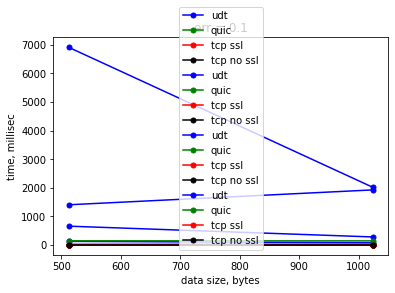

In [117]:
# UDT данные + график с QUIC
# МИН ЗАДЕРЖКА
for p2p in p2pArr:
  for err in errArr:
    x1 = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    min1=[]
    min2=[]
    min3=[]
    min4=[]
    max1=[]
    max2=[]
    max3=[]
    max4=[]
    for byte_size in byte_sizeArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      if existKey(dataName(str(byte_size), str(err), str(p2p))) == False:
        continue
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      #_dataTCP = _dataUDT
      #strr = '/content/data/tcp/GET_res_with_'+str(byte_size)+"_b_"+str(p2p)+"ms_"+str(err)+"-loss.txt" #GET_res_with_1024_b_100ms_0.1-loss
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPssl = pd.read_csv(strr, sep='\t')
      strr = '/content/data/tcp/nossl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPnossl = pd.read_csv(strr, sep='\t')
      time = _data[_data.columns[3]]
      #print(file,err, time.sum())
      x1.append(byte_size)
      y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      y4.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 90) /1000)
      min4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 20) /1000)
      max4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 20) /1000)
    print("err = "+ str(err*100))
    print4(y1,y2,y3,y4,min1,min2,min3,min4,max1,max2,max3,max4,"err")
    plt.title("err = " + str(err))
    plt.xlabel('data size, bytes')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp ssl", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.plot(x1, y4, label = "tcp no ssl", color='black', markerfacecolor='black', markersize=5, marker='o') 
    plt.legend()
    #plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table.add_row(np.round(y4, 2))
    table._field_names.insert(0, "protocol/size") 
    table._align["protocol/size"] = 'c' 
    table._valign["protocol/size"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp ssl") 
    table._rows[3].insert(0, "tcp no ssl") 
    #print(table)
    #
  break

err = 0.0
p2p	
UDT  mean:	
 p20:	
 p90:	
QUIC  mean:	
 p20:	
 p90:	
TCP ssl mean:	
 ssl p20:	
 ssl p90:	
TCP nossl mean:	
 nossl p20:	
 nossl p90:	
+---------------+
| protocol/size |
+---------------+
|      udt      |
|      quic     |
|    tcp ssl    |
|   tcp no ssl  |
+---------------+
err = 1.0
p2p	
UDT  mean:	
 p20:	
 p90:	
QUIC  mean:	
 p20:	
 p90:	
TCP ssl mean:	
 ssl p20:	
 ssl p90:	
TCP nossl mean:	
 nossl p20:	
 nossl p90:	
+---------------+
| protocol/size |
+---------------+
|      udt      |
|      quic     |
|    tcp ssl    |
|   tcp no ssl  |
+---------------+
err = 5.0
p2p	
UDT  mean:	
 p20:	
 p90:	
QUIC  mean:	
 p20:	
 p90:	
TCP ssl mean:	
 ssl p20:	
 ssl p90:	
TCP nossl mean:	
 nossl p20:	
 nossl p90:	
+---------------+
| protocol/size |
+---------------+
|      udt      |
|      quic     |
|    tcp ssl    |
|   tcp no ssl  |
+---------------+
err = 10.0
p2p	
UDT  mean:	
 p20:	
 p90:	
QUIC  mean:	
 p20:	
 p90:	
TCP ssl mean:	
 ssl p20:	
 ssl p90:	
TCP nossl mean:	
 

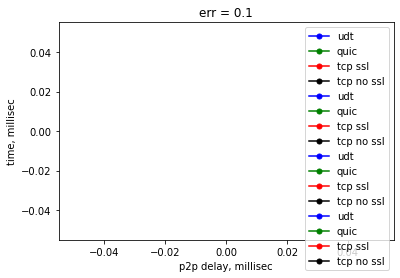

In [118]:
# UDT данные + график с QUIC
# ФАЙЛ 2 кб
for byte_size in byte_sizeArr[2:3]:
  for err in errArr:
    x1 = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    min1=[]
    min2=[]
    min3=[]
    min4=[]
    max1=[]
    max2=[]
    max3=[]
    max4=[]
    for p2p in p2pArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      if existKey(dataName(str(byte_size), str(err), str(p2p))) == False:
        continue
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      #_dataTCP = _dataUDT
      #strr = '/content/data/tcp/GET_res_with_'+str(byte_size)+"_b_"+str(p2p)+"ms_"+str(err)+"-loss.txt" #GET_res_with_1024_b_100ms_0.1-loss
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPssl = pd.read_csv(strr, sep='\t')
      strr = '/content/data/tcp/nossl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPnossl = pd.read_csv(strr, sep='\t')
      time = _data[_data.columns[3]]
      #print(file,err, time.sum())
      x1.append(p2p)
      y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      y4.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 90) /1000)
      min4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 20) /1000)
      max4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 20) /1000)
    print("err = "+ str(err*100))
    print4(y1,y2,y3,y4,min1,min2,min3,min4,max1,max2,max3,max4,"p2p")
    plt.title("err = " + str(err))
    plt.xlabel('p2p delay, millisec')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp ssl", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.plot(x1, y4, label = "tcp no ssl", color='black', markerfacecolor='black', markersize=5, marker='o') 
    plt.legend()
    #plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table.add_row(np.round(y4, 2))
    table._field_names.insert(0, "protocol/size") 
    table._align["protocol/size"] = 'c' 
    table._valign["protocol/size"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp ssl") 
    table._rows[3].insert(0, "tcp no ssl") 
    print(table)
    #

In [119]:
# UDT данные + график с QUIC
# Макс ошибка
for p2p in p2pArr:
  for err in errArr[3:4]:
    x1 = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    min1=[]
    min2=[]
    min3=[]
    min4=[]
    max1=[]
    max2=[]
    max3=[]
    max4=[]
    for byte_size in byte_sizeArr:
      file = resfile(str(byte_size),str(p2p),str(err))
      _dataUDT = pd.read_csv('/content/data/udt/'+resfile(str(byte_size),str(p2p),str(err)), sep='\t')
      _dataQUIC = getDFfromDict(dataName(str(byte_size), str(err), str(p2p)))
      strr = '/content/data/tcp/ssl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPssl = pd.read_csv(strr, sep='\t')
      strr = '/content/data/tcp/nossl/GET_res_with_'+str(byte_size)+"_"+str(err)+"_"+str(p2p)+"_b.txt" #GET_res_with_1024_b_100ms_0.1-loss
      _dataTCPnossl = pd.read_csv(strr, sep='\t')
      time = _data[_data.columns[3]]
      x1.append(byte_size)
      y1.append(_dataUDT[_dataUDT.columns[3]].mean()/1000)
      y2.append(_dataQUIC[_dataQUIC.columns[3]].mean()/1000)
      y3.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      y4.append(_dataTCP[_dataUDT.columns[3]].mean()/1000)
      min1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 90) /1000)
      min2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 90) /1000)
      min3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 90) /1000)
      min4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 90) /1000)
      max1.append(np.percentile(_dataUDT[_dataUDT.columns[3]], 20) /1000)
      max2.append(np.percentile(_dataQUIC[_dataUDT.columns[3]], 20) /1000)
      max3.append(np.percentile(_dataTCPssl[_dataUDT.columns[3]], 20) /1000)
      max4.append(np.percentile(_dataTCPnossl[_dataUDT.columns[3]], 20) /1000)
    print("p2p = "+ str(p2p))
    print4(y1,y2,y3,y4,max1,max2,max3,max4,min1,min2,min3,min4,"byte_size")
    break
    plt.title("p2p = " + str(p2p))
    plt.xlabel('data size, bytes')
    plt.ylabel('time, millisec')
    plt.plot(x1, y1, label = "udt", color='blue', markerfacecolor='blue', markersize=5, marker='o')
    plt.plot(x1, y2, label = "quic", color='green', markerfacecolor='green', markersize=5, marker='o')
    plt.plot(x1, y3, label = "tcp ssl", color='red', markerfacecolor='red', markersize=5, marker='o') 
    plt.plot(x1, y4, label = "tcp no ssl", color='black', markerfacecolor='black', markersize=5, marker='o') 
    plt.legend()
    #plt.show()
    #
    table = PrettyTable(x1)
    table.add_row(np.round(y1, 2))
    table.add_row(np.round(y2, 2))
    table.add_row(np.round(y3, 2))
    table.add_row(np.round(y4, 2))
    table._field_names.insert(0, "protocol/size") 
    table._align["protocol/size"] = 'c' 
    table._valign["protocol/size"] = 't'
    table._rows[0].insert(0, "udt") 
    table._rows[1].insert(0, "quic") 
    table._rows[2].insert(0, "tcp ssl") 
    table._rows[3].insert(0, "tcp no ssl") 
    #print(table)
    #
    break;

KeyError: ignored

In [ ]:
i=0
byte_sizeArr = []
p2pArr = []
errArr = []

for fl in onlyfiles:
  _data = pd.read_csv('/content/data/udt/'+fl, sep='\t')
  byte_size = _data[_data.columns[0]].iloc[0]
  p2p = _data[_data.columns[1]].iloc[0]
  err = _data[_data.columns[2]].iloc[0]
  if not(byte_size in byte_sizeArr):
    byte_sizeArr.append(byte_size)
  if not(p2p in p2pArr):
    p2pArr.append(p2p)
  if not(err in errArr):
    errArr.append(err)    
  i=i+1
byte_sizeArr.sort()
p2pArr.sort()
errArr.sort()
print("")